In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
%matplotlib inline

In [270]:
data_df = pd.read_excel('Chapter4_Education Indicators 2014-V3.xls')
data_df

,Country Name,PRPE,OOCP,ESE,EPE,TDP
0,Albania,0.73,2.452608,115.179977,67.637665,5
1,United Arab Emirates,0.22,1.608054,45.238137,45.099024,5
2,Azerbaijan,0.16,2.393373,99.558063,54.295093,4
3,Burundi,24.25,6.401673,53.925816,189.222566,6
4,Belgium,2.49,0.582128,107.745441,68.876621,6
...,...,...,...,...,...,...
57,El Salvador,6.06,6.675010,102.339569,127.223380,6
58,Serbia,0.45,0.557458,76.874295,39.934221,4
59,Slovenia,0.78,1.190118,70.407569,54.146015,6
60,Sweden,0.00,0.184301,85.260378,78.089461,6


In [271]:
# Fill data to correspond variables
X = data_df.iloc[:,1:]
Names = data_df.iloc[:,0]

In [272]:
# Standardlize 
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [273]:
# Doing PCA with 2 principal components
pca = PCA(n_components=2)
Z = pca.fit_transform(X)
print("min:",Z.min(),"max:",Z.max(), "Z.shape:",Z.shape,"X.shape", X.shape)

min: -2.2123716578966914 max: 3.6504138250165385 Z.shape: (62, 2) X.shape (62, 5)


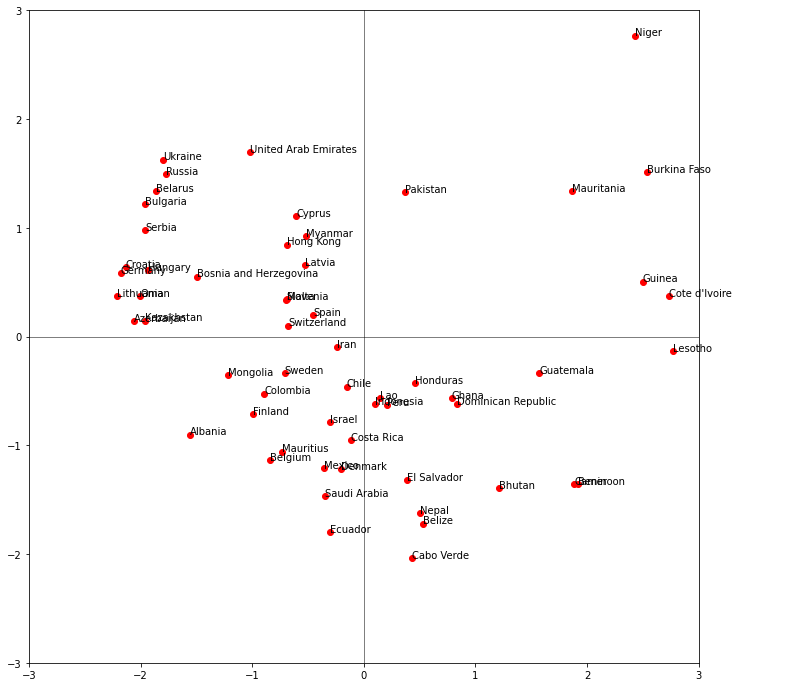

In [274]:
# Show PCA's result 
fig, ax = plt.subplots(figsize=(12,12))
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.axhline(lw=0.5, color='black', )
plt.axvline(linewidth=0.5, color='black')

n = Z.shape[0]
for i in range(n):
    plt.plot(Z[i][0], Z[i][1],'ro')
    ax.annotate(Names[i],(Z[i][0], Z[i][1]))

In [275]:
# Doing DBSCAN
clustering = DBSCAN(eps=0.5,min_samples=2).fit(Z)

labels = clustering.labels_
print("labels:",labels)

#n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
numberOfCluster = labels.max()+1
numberOfNoise = list(labels).count(-1)

print('Estimated number of clusters: %d' % numberOfCluster)
print('Estimated number of noise points: %d' % numberOfNoise)

labels: [-1 -1  0 -1  1  2 -1  0  0  0  3 -1  1  1  4  2  1  3  1  1  0  1  1  1
  1  1  1  4 -1  1  1  0  0  1  1  1  0  1 -1 -1  0  1  1 -1  1  1  1 -1
 -1  1 -1  3  0 -1  1  0  1  3  0  1  1  0]
Estimated number of clusters: 5
Estimated number of noise points: 13


In [276]:
#Generate color
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, numberOfCluster)]
colors

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0),
 (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0),
 (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

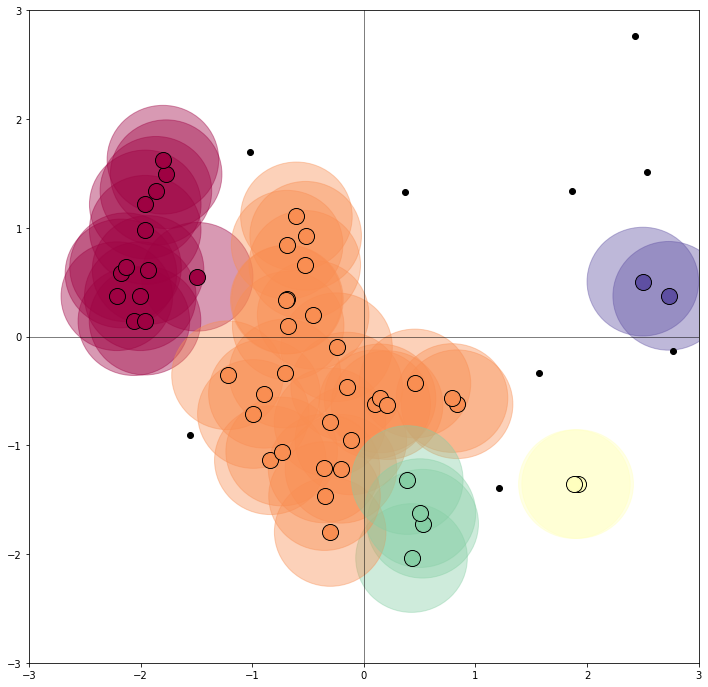

In [277]:
# Show the clusters 
fig, ax = plt.subplots(figsize=(12,12))
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.axhline(lw=0.5, color='black', )
plt.axvline(linewidth=0.5, color='black')

n = Z.shape[0]
# draw regions
for i in range(n):
    if labels[i] != -1:
        regionColor = (colors[labels[i]][0],colors[labels[i]][1],colors[labels[i]][2],0.4)
        c = plt.Circle(xy=(Z[i][0], Z[i][1]), radius=clustering.eps, color=regionColor)
        ax.add_patch(c)

# draw points
for i in range(n):
    if labels[i] == -1:
        plt.plot(Z[i][0], Z[i][1],'o',color='black')
    else:
        plt.plot(Z[i][0], Z[i][1],'o',color='black',markersize=16)
        plt.plot(Z[i][0], Z[i][1],'o',color=colors[labels[i]],markersize=14)